In [5]:
#importar dados de usd
from bcb import currency
from bcb import sgs
import numpy as np
import datetime

# Importing Packages
import yfinance as yf
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#criando um dataframe com dados diários do dolar
usd = currency.get(['USD'], start='2019-01-01', end='2022-07-14')
usd['vol_dif']=(usd['USD']-usd['USD'].shift(1))/usd['USD'].shift(1)
usd['vol_var']=np.sqrt(np.var(usd['USD']))
usd['vol_mod']=np.sqrt(((usd['USD']-usd['USD'].shift(1))/usd['USD'].shift(1))**2)
usd.head(2)

,USD,vol_dif,vol_var,vol_mod
Date,,,,
2019-01-02,3.8595,NaN,0.667316,NaN
2019-01-03,3.7683,-0.02363,0.667316,0.02363


<Figure size 1080x432 with 0 Axes>

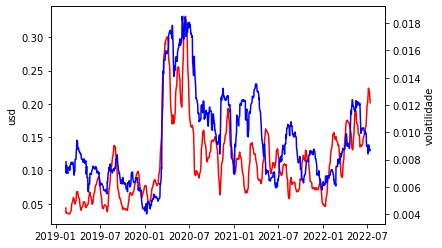

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Conjunto de dados para teste

width = 0.4

# Cria figura com eixo Y na esquerda (padrão), e plota dados nele
plt.figure(figsize=(15, 6))
figure, left_ax = plt.subplots()
left_ax.plot(usd.index, usd.USD.rolling(window=30).std(), color='red')
left_ax.set_ylabel('usd')

# Cria eixo Y na direita e plota dados nele
right_ax = left_ax.twinx()
right_ax.plot(usd.index, usd.vol_dif.rolling(window=30).std(), color='blue')
right_ax.set_ylabel('volatilidade')

# Mostra o gráfico
plt.show()

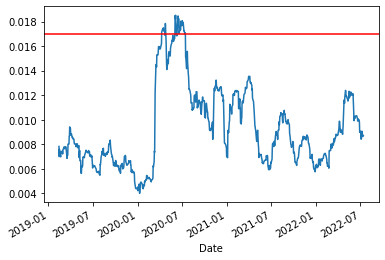

In [4]:
media_movel_vol=usd.vol_dif.rolling(window=30).std()
media_movel_vol.plot()
plt.axhline(y = 0.017, color = 'r', linestyle = '-');

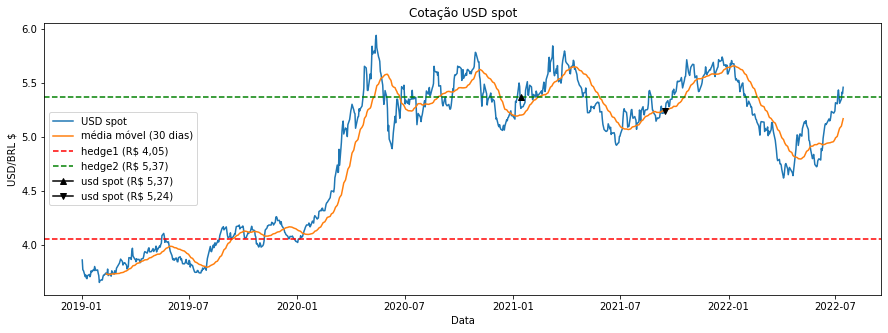

In [14]:
plt.figure(figsize=(15,5))
plt.plot(usd.index,usd.USD)
media_movel_vol=usd.USD.rolling(window=30).mean()
plt.plot(usd.index, media_movel_vol)
#ponto de hedge 
plt.axhline(y = 4.05 , color = 'r', linestyle = '--')


#ponto de colheita
plt.axhline(y = 5.37 , color = 'g', linestyle = '--')
plt.plot(datetime.date(2021,1,15), 5.37, marker='^', color="black")
plt.plot(datetime.date(2021,9,15), 5.24, marker='v', color="black")
plt.xlabel('Data')
plt.ylabel('USD/BRL $')
plt.title('Cotação USD spot')
plt.legend(['USD spot','média móvel (30 dias)','hedge1 (R$ 4,05)','hedge2 (R$ 5,37)','usd spot (R$ 5,37)','usd spot (R$ 5,24)']);